# 2R マニピュレータの逆運動学

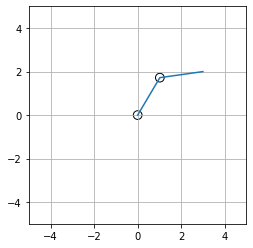

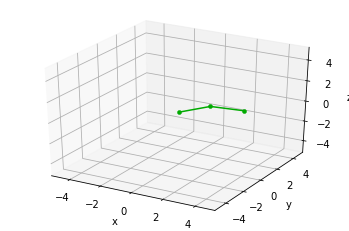

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import robotmodel_2r

# マニピュレータの設定
robo = robotmodel_2r.Robot2R()
robo.eejoint.position = [3, 2, 0]

# 逆運動学
x = robo.eejoint.position[0]
y = robo.eejoint.position[1]

l1 = robo.links[0].length
l2 = robo.links[1].length

temp1 = (x**2 + y**2 + l1**2 - l2**2) / (2 * l1 * math.sqrt(x**2 + y**2))

th1 = math.acos(temp1) + math.atan(y/x)
th2 = math.atan((y - l1 * math.sin(th1))/(x - l1 * math.cos(th1))) - th1

robo.joints[0].angle = th1
robo.joints[1].angle = th2


# 順運動学
import kinematics_2r
kinematics_2r.kinematics(robo)

# 描画
import view_2r
view_2r.view(robo)

import view_2r_3d
view_2r_3d.view(robo)